In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import SVG

plt.rcParams['figure.figsize'] = [12, 9]

# Simple Neuron from the Ground Up

## Linear regression

The slope of a straight line is closely related to the angle made by the line with the x-axis, since 

$$m=\tan\theta=\frac{\text{Opposite}}{\text{Adjacent}}=\frac{y-y_0}{x-x_0}$$

If we would want to know the derivative of a certain function, we just need to take really close points on that function and draw a straight line. This leads to the definition of derivative

$$\frac{dy}{dx}=\lim_{h\to 0} \frac{y(x+h)-y(x)}{h}=\lim_{x\to x_0} \frac{y(x)-y(x_0)}{x-x_0}$$

and it basically tells the amount of change in $y$ when $x$ changes a little

Rearranging this, we find that a good approximation of $y$ close to $x_0$ is

$$y(x) = y(x_0)+ \left.\frac{dy}{dx}\right|_{x_0}\left(x-x_0\right)$$

or

$$y(x) = \left.\frac{dy}{dx}\right|_{x_0} x + y(x_0) - \left.\frac{dy}{dx}\right|_{x_0} x_0$$

Since the last two terms are constant, we can rewrite this using $\left.\frac{dy}{dx}\right|_{x_0} = w$ and $ b = y(x_0) - \left.\frac{dy}{dx}\right|_{x_0} x_0$ as

$$y(x) = wx+b$$

![righttriangle](img/right_triangle.png)

## Activation Function

The purpose of an activation function is to introduce non-linearity to the output of a neuron.

Given $\vec{x}\in \mathcal{R}^{n_x}$, we want to find $\hat{y}$ which is, for example, the probability of $y=1$ on binary classification.

The parameters are the weights $\vec{w}\in \mathcal{R}^{n_x}$ and the bias $b\in\mathcal{R}$.

The output is $\hat{y}=\rho\left({\vec{w}}^{T}\cdot \vec{x} + b\right)$, when $\rho$ is the sigmoid function, defined as
$$\rho(z) = \frac{1}{1+\exp^{-z}}$$

In [2]:
# Exponential in series definition
def expuz(x, n=10000000):
    return (1.+x/n)**n

# Sigmoid function definition
def ρ(x):
    return 1./(1. + expuz(-x))

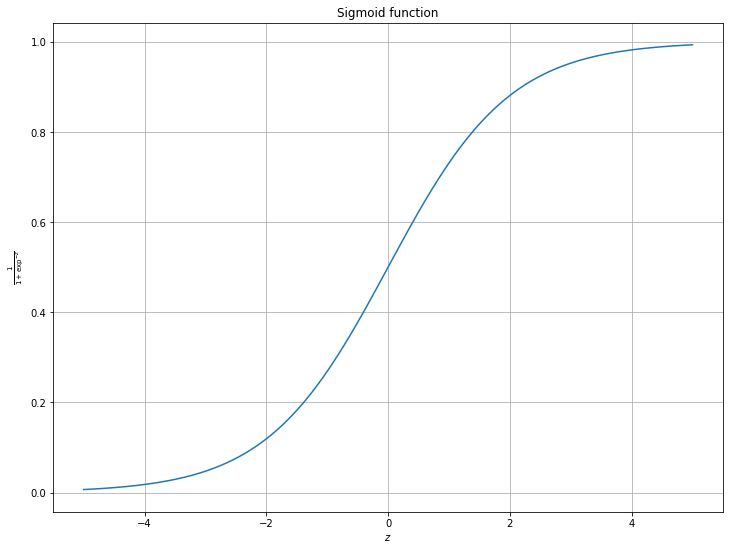

In [3]:
# Plotting sigmoid

z = np.linspace(-5,5,500)
y = ρ(z)

plt.plot(z,y)
plt.xlabel(r'$z$')
plt.ylabel(r'$\frac{1}{1+\exp^{-z}}$')
plt.title('Sigmoid function')
plt.grid()
plt.show()


## Cost function

Given a set of $m$ training examples $\vec{x}^{(i)}$ with $i\in\{0,1,\dots,m\}$, and the appropiate labels $y^{(i)}$, we want the prediction $\hat{y}^{(i)}$ to be $\hat{y}^{(i)}\approx y^{(i)}$

We define an **Error function** (or **Loss function**). We could select the squared error

$$\mathcal{L}\left(\hat{y},y\right)=\frac{1}{2}\left(\hat{y}-y\right)^2$$

remembering that this may not achieve a global minima, since the optimization problem becames non-convex.

We define the **Cost function** as 

$$J(\vec{w},b) = \frac{1}{m}\sum_{i=1}^m \mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)$$

## Gradient Descent

Find the $\vec{w}$ and $b$ that minimize $J(\vec{w},b)$. In order to do that, we just need to repeat

$$w_{j,t+1} = w_{j,t}-\alpha \frac{\partial J(\vec{w}_t,b_t)}{\partial w_{j,t}}$$

$$b_{t+1} = b_{t}-\alpha \frac{\partial J(\vec{w}_t,b_t)}{\partial b_t}$$

Where $j$ is the j-component of the vector $\vec{w}$. Using the above definition of the loss function, we derive with respect to $w_j$

$\frac{\partial J(\vec{w},b)}{\partial w_j}=\frac{\partial}{\partial w_j}\left[\frac{1}{m}\sum_{i=1}^m\mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)\right] = \frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial w_j}\left[\mathcal{L}\left(\hat{y}^{(i)}, y^{(i)}\right)\right] =\frac{1}{m}\sum_{i=1}^m\frac{\partial}{\partial w_j}\left[\frac{1}{2}\left(\hat{y}^{(i)}-y^{(i)}\right)^2\right]$

Let's derive the last expression, and let's not use the $i$ superscript to don't get confuse with notation, keeping it mind this will be done for every $\left(\vec{x}^{(i)},\hat{y}^{(i)}\right)$ sample set

$\frac{\partial}{\partial w_j}\left[\frac{1}{2}\left(\hat{y}-y\right)^2\right]=\left(\hat{y}-y\right)\frac{\partial}{\partial w_j}\left[\hat{y}-y\right]=\left(\hat{y}-y\right)\frac{\partial\hat{y}}{\partial w_j}=\left(\hat{y}-y\right)\frac{d\rho}{dz}\frac{\partial z}{\partial w_j}$

where $\hat{y}^{(i)}=\rho\left(z^{(i)}\right)=\rho\left(\vec{w}\cdot \vec{x}^{(i)} + b\right)$.

Let's first get partial derivative of the sigmoid function with respect to $z$.

$$\frac{d\rho}{dz}=\frac{d}{dz}\left(\frac{1}{1+\exp^{-z}}\right)=\left(\frac{1}{1+\exp^{-z}}\right)^2\left(\exp^{-z}\right)=\rho\left(z\right)^2\left(\frac{1}{\rho(z)}-1\right)=\rho(z)(1-\rho(z))$$

Finally

$$\frac{\partial z^{(i)}}{\partial w_j}=x^{(i)}_j$$

Therefore

$$\frac{\partial J(\vec{w},b)}{\partial w_j}=\frac{1}{m}\sum_{i=1}^m\left(\hat{y}^{(i)}-y^{(i)}\right)\frac{d\rho}{dz^{(i)}}\frac{\partial z^{(i)}}{\partial w_j}= \left[\rho\left(z^{(i)}\right)-y^{(i)}\right]\rho\left(z^{(i)}\right)\left[1-\rho\left(z^{(i)}\right)\right]x^{(i)}_j$$

## Single Neuron Plot (One training sample)

![neuron](img/neuron.png)

In [4]:
# Input
x = [0.2, 0.1, 0.3]

# Initial weights
w = [0.25, 0.2, 0.4]

# Training step (learning rate)
α = 1

# Desired output
y = 0.3

# Iterations
t = 500
n = len(x)

J = []

for i in range(t):
    xw = 0.0

    for j in range(n):
        xw += x[j]*w[j]
        
    dJdw = []

    # Computing gradient
    for j in range(n):
        dJdw.append((ρ(xw)-y)*ρ(xw)*(1.-ρ(xw))*x[j])

    # Weight update using gradient descend
    for j in range(n):
        w[j] -= α * dJdw[j]

    J.append(0.5*(ρ(xw)-y)**2)
        
print("Predicted value after", t, "iterations:" , ρ(xw))

Predicted value after 500 iterations: 0.3066439406939304


### Cost function plot

Text(0.5, 1.0, 'Cost Function Plot')

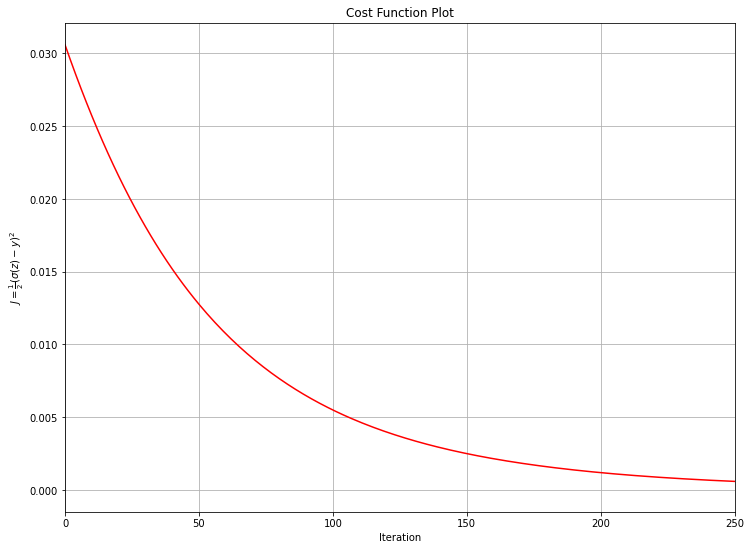

In [5]:
iteration = np.arange(len(J))
plt.plot(iteration,J,'r')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel(r'$J = \frac{1}{2}\left(\sigma(z)-y \right)^2$')
plt.xlim(0,250)
plt.title('Cost Function Plot')

## Single Neuron Plot (Two training samples)

In [8]:
# Input
x_1 = [0.2, 0.1, 0.3]
x_2 = [0.5, 0.2, 0.4]

# Initial weights
w = [0.25, 0.2, 0.4]

# Training step (learning rate)
α = 1

# Desired output
y_1 = 0.2
y_2 = 0.8

# Iterations
t = 18000
n = len(x)

J = []

for i in range(t):
    xw1 = 0.0
    xw2 = 0.0

    for j in range(n):
        xw1 += x_1[j]*w[j]
        xw2 += x_2[j]*w[j]
        
    dJdw_1 = []
    dJdw_2 = []
    
    # Computing gradient
    for j in range(n):
        dJdw_1.append((ρ(xw1)-y_1)*ρ(xw1)*(1.-ρ(xw1))*x_1[j])
        dJdw_2.append((ρ(xw2)-y_2)*ρ(xw2)*(1.-ρ(xw2))*x_2[j])

    # Weight update using gradient descend
    for j in range(n):
        w[j] -= α * (dJdw_1[j]+dJdw_2[j])/2

    J.append( (1/2) * (0.5*(ρ(xw1)-y_1)**2 + 0.5*(ρ(xw2)-y_2)**2) )
        
print("Predicted values after", t, "iterations:" , ρ(xw1), " ",ρ(xw2))

Predicted values after 18000 iterations: 0.21448763967830714   0.7919242450279652


Text(0.5, 1.0, 'Cost Function Plot')

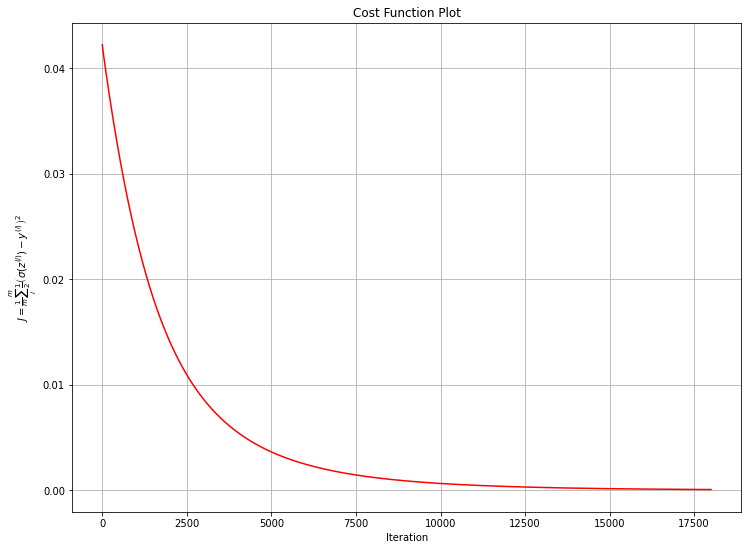

In [9]:
iteration = np.arange(len(J))
plt.plot(iteration,J,'r')
plt.grid()
plt.xlabel('Iteration')
plt.ylabel(r'$J = \frac{1}{m}\sum_i^m\frac{1}{2}\left(\sigma(z^{(i)})-y^{(i)} \right)^2$')
plt.title('Cost Function Plot')

### Final comment

Python Numpy packages would make this easier and more efficient by vectorizing the input vectors as well as putting this vectors on a matrix to send "batches" to the neural network, but it is worth noticing we can do exactly the same by using simple lists.